<a href="https://colab.research.google.com/github/collinsmokaya28/AI-Startup/blob/main/Project_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load kiva_loans dataset
kiva_loans = pd.read_csv("/content/kiva_loans.csv")

# Load kiva_mpi_region_locations dataset
kiva_mpi_region_locations = pd.read_csv("/content/kiva_mpi_region_locations.csv")


In [3]:
# Merge datasets on the shared attribute (e.g., country)
merged_data = pd.merge(kiva_loans, kiva_mpi_region_locations, on='country')


In [ ]:
# Check the column names of the merged dataset
print(merged_data.columns)


In [ ]:
print(merged_data.head())

In [7]:
# Extract relevant variables such as loan amounts, borrower demographics, and geographic information
relevant_variables = merged_data[['loan_amount', 'borrower_genders', 'country', 'world_region', 'MPI']]


In [ ]:
# Display the first few rows of the merged and extracted data
print(relevant_variables.head())


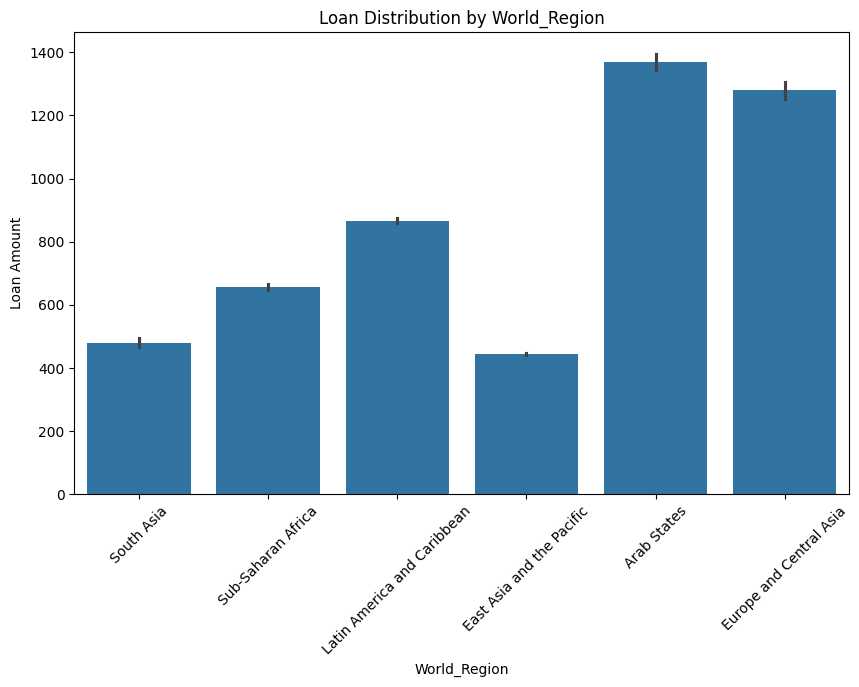

In [17]:
# Visualizing Loan Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='world_region', y='loan_amount', data=merged_data)
plt.title('Loan Distribution by World_Region')
plt.xlabel('World_Region')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

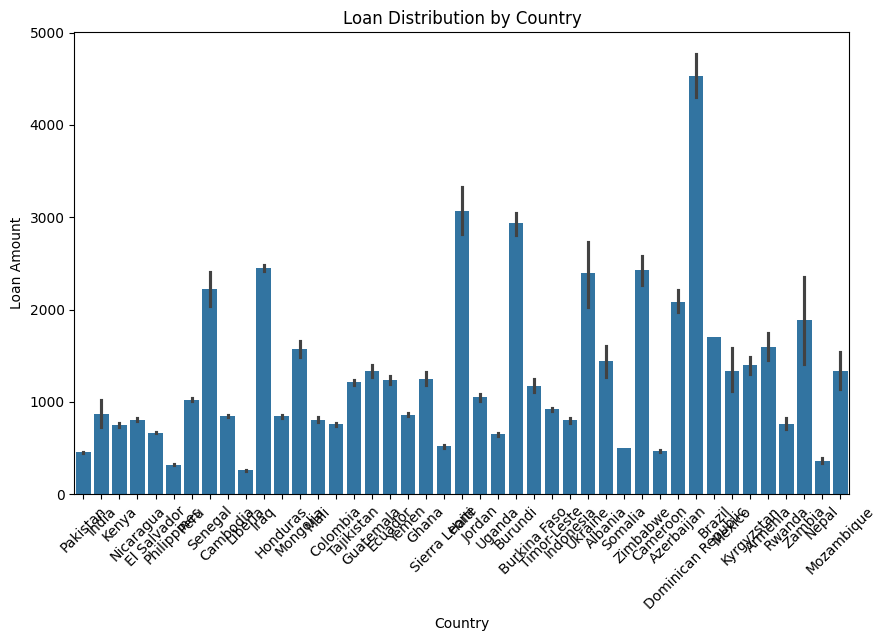

In [38]:
# Visualizing Loan Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='loan_amount', data=merged_data)
plt.title('Loan Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()


<ipython-input-25-0e33620b9288>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_amount', y='country', data=loan_volumes_by_country, palette='viridis')


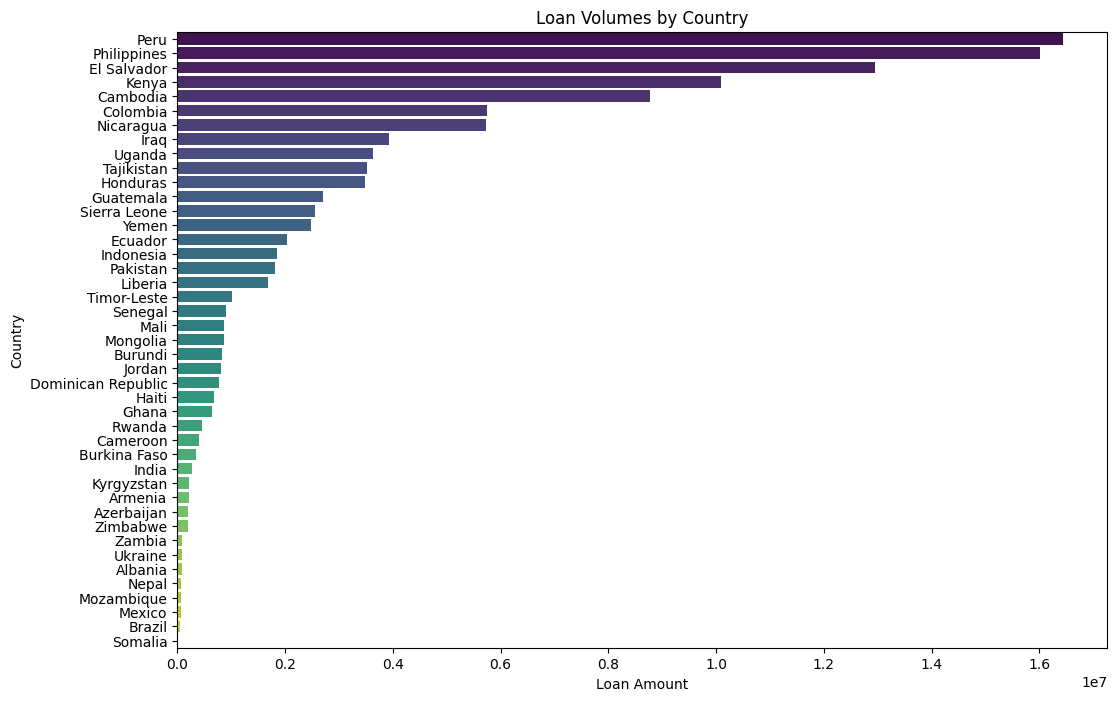

In [25]:
# Group loans by country and calculate total loan amounts
loan_volumes_by_country = merged_data.groupby('country')['loan_amount'].sum().reset_index()

# Sort the data by loan amount in descending order
loan_volumes_by_country = loan_volumes_by_country.sort_values(by='loan_amount', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='loan_amount', y='country', data=loan_volumes_by_country, palette='viridis')
plt.title('Loan Volumes by Country')
plt.xlabel('Loan Amount')
plt.ylabel('Country')
plt.show()


In [36]:
# Define the threshold value for MPI score
threshold = 0.2

# Calculate the percentage of loans in low-income regions based on the threshold
low_income_loan_percentage = (merged_data[merged_data['MPI'] <= threshold].loan_amount.sum() / merged_data.loan_amount.sum()) * 100

# Print the percentage of loans in low-income regions
print(f"Percentage of loans in low-income regions: {low_income_loan_percentage:.2f}%")


Percentage of loans in low-income regions: 78.53%


In [34]:
# Calculate loan uptake by region
loan_uptake_by_region = merged_data.groupby('world_region')['loan_amount'].sum().reset_index()

# Calculate the MPI score mean by region
mpi_mean_by_region = merged_data.groupby('world_region')['MPI'].mean().reset_index()

# Merge loan uptake and MPI mean data
region_data = loan_uptake_by_region.merge(mpi_mean_by_region, on='world_region')

# Define a threshold for low loan uptake and low MPI score
low_loan_threshold = 10000000  # Adjust as needed
low_mpi_threshold = 0.5  # Adjust as needed

# Identify priority regions
priority_regions = region_data[(region_data['loan_amount'] < low_loan_threshold) & (region_data['MPI'] < low_mpi_threshold)]

# Print priority regions
print("Priority Regions for Expansion and Financial Access Efforts:")
print(priority_regions)


Priority Regions for Expansion and Financial Access Efforts:
              world_region  loan_amount       MPI
0              Arab States    7232200.0  0.140495
2  Europe and Central Asia    4327100.0  0.046600
4               South Asia    2165600.0  0.228328


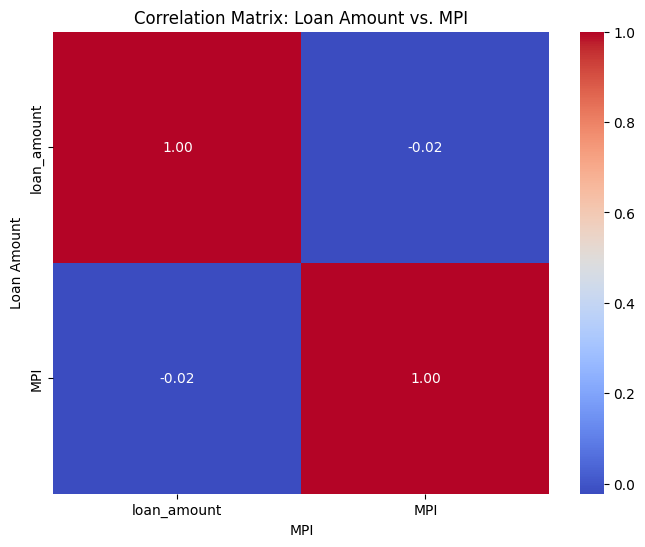

Average loan amount in high MPI regions: 685.2960902670927
Average loan amount in low MPI regions: 670.8720803134512


In [35]:
# Correlation Analysis
correlation_matrix = merged_data[['loan_amount', 'MPI']].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Loan Amount vs. MPI')
plt.xlabel('MPI')
plt.ylabel('Loan Amount')
plt.show()

# Impact Evaluation
# Example: Compare loan distribution in regions with high vs. low MPI scores
high_mpi_regions = merged_data[merged_data['MPI'] > merged_data['MPI'].mean()]
low_mpi_regions = merged_data[merged_data['MPI'] <= merged_data['MPI'].mean()]

# Calculate average loan amounts in high and low MPI regions
average_loan_amount_high_mpi = high_mpi_regions['loan_amount'].mean()
average_loan_amount_low_mpi = low_mpi_regions['loan_amount'].mean()

# Print results
print(f"Average loan amount in high MPI regions: {average_loan_amount_high_mpi}")
print(f"Average loan amount in low MPI regions: {average_loan_amount_low_mpi}")
